# Importar archivo .las utilizando LASIO - plotear curvas

### INDICE
#### 1. [Importar archivo LAS con lasio](#lasio)
#### 2. [Ver datos del archivo .las (Lasio tips)](#lasio_tips)
#### 3. [Crear dataframe (pandas)](#pandas)
#### 4. [Visualización de datos (matplotlib)](#matplotlib)


In [62]:
# Celda donde se importan todas las librerias que utilizaremos en este notebook

import numpy as np
import pandas as pd
import lasio

import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter   
from matplotlib.ticker import MaxNLocator
%matplotlib inline

# mplcursors es una libreria que nos va a permitir ver los valores de las curvas mientras desplacemos el mouse sobre ellas
# en gráficos hechos con matplotlib. Para que funcione en jupyter, debemos correr también %matplotlib notebook.
# mplcursors no viene con matplotlib, hay que instalarla aparte.
import mplcursors
%matplotlib notebook


<a id='lasio'></a>
#  Importar archivo .las con lasio
https://lasio.readthedocs.io/en/latest/

In [81]:
# Importar archivo LAS 

las = lasio.read(r'D:\Pablo\Python\working_files\Equinor\15_9-23.las')

<a id='lasio_tips'></a>
## Ver datos del archivo .las (Lasio tips)
Los tips para mostrar datos del LAS fueron sacados de esta página:
https://andymcdonaldgeo.medium.com/loading-and-displaying-well-log-data-b9568efd1d8

In [82]:
# Si miramos el tipo de variable veremos que es lasio.las.LASfile 
type(las)

lasio.las.LASFile

In [83]:
# VER PARAMETROS DEL HEADER DEL ARCHIVO LAS (1)

las.well

[HeaderItem(mnemonic="STRT", unit="m", value="110.0", descr=""),
 HeaderItem(mnemonic="STOP", unit="m", value="3225.0", descr=""),
 HeaderItem(mnemonic="STEP", unit="m", value="0.152", descr=""),
 HeaderItem(mnemonic="NULL", unit="", value="-999.25", descr=""),
 HeaderItem(mnemonic="COMP", unit="", value="", descr="COMPANY"),
 HeaderItem(mnemonic="WELL", unit="", value="15/9-23 Skardkollen", descr="WELL"),
 HeaderItem(mnemonic="FLD", unit="", value="", descr="FIELD"),
 HeaderItem(mnemonic="LOC", unit="", value="", descr="LOCATION"),
 HeaderItem(mnemonic="SRVC", unit="", value="", descr="SERVICE COMPANY"),
 HeaderItem(mnemonic="DATE", unit="", value="2020-08-09 20:01:11   : Log Export"),
 HeaderItem(mnemonic="PROV", unit="", value="", descr="PROVINCE"),
 HeaderItem(mnemonic="UWI", unit="", value="15/9-23", descr="UNIQUE WELL ID"),
 HeaderItem(mnemonic="API", unit="", value="", descr="API NUMBER")]

In [84]:
# VER PARAMETROS DEL HEADER DEL ARCHIVO LAS (2)

for item in las.well:
    print(f'{item.descr} ({item.mnemonic}): {item.value}')

 (STRT): 110.0
 (STOP): 3225.0
 (STEP): 0.152
 (NULL): -999.25
COMPANY (COMP): 
WELL (WELL): 15/9-23 Skardkollen
FIELD (FLD): 
LOCATION (LOC): 
SERVICE COMPANY (SRVC): 
ss} (DATE): 2020-08-09 20:01:11   : Log Export Date {yyyy-MM-dd HH:mm
PROVINCE (PROV): 
UNIQUE WELL ID (UWI): 15/9-23
API NUMBER (API): 


In [85]:
# COMO OBTENER EL VALOR DE CADA PARAMETRO 

print(las.well.WELL.value)
print(las.well.STOP.value)

15/9-23 Skardkollen
3225.0


In [86]:
# VER INFORMACION DE LAS CURVAS EN EL ARCHIVO .las (1)

print(las.curves)

Mnemonic                           Unit   Value  Description                        
--------                           ----   -----  -----------                        
DEPT                               m             DEPTH                              
FORCE_2020_LITHOFACIES_CONFIDENCE  _             FORCE_2020_LITHOFACIES_CONFIDENCE  
FORCE_2020_LITHOFACIES_LITHOLOGY   _             FORCE_2020_LITHOFACIES_LITHOLOGY   
CALI                               in            CALI                               
BS                                 in            BS                                 
DCAL                               in            DCAL                               
ROPA                               _             ROPA                               
ROP                                m/h           ROP                                
RDEP                               ohm.m         RDEP                               
RMED                               ohm.m         RMED            

In [87]:
# VER INFORMACION DE LA CURVAS EN EL ARCHIVO .las (2)

for count, curve in enumerate(las.curves):
    (count)
print(f'TOTAL DE CURVAS: {count+1}\n')
for count, curve in enumerate(las.curves):
    print ((count+1),":", f"{curve.mnemonic}, Units: {curve.unit}, Description: {curve.descr}")

TOTAL DE CURVAS: 21

1 : DEPT, Units: m, Description: DEPTH
2 : FORCE_2020_LITHOFACIES_CONFIDENCE, Units: _, Description: FORCE_2020_LITHOFACIES_CONFIDENCE
3 : FORCE_2020_LITHOFACIES_LITHOLOGY, Units: _, Description: FORCE_2020_LITHOFACIES_LITHOLOGY
4 : CALI, Units: in, Description: CALI
5 : BS, Units: in, Description: BS
6 : DCAL, Units: in, Description: DCAL
7 : ROPA, Units: _, Description: ROPA
8 : ROP, Units: m/h, Description: ROP
9 : RDEP, Units: ohm.m, Description: RDEP
10 : RMED, Units: ohm.m, Description: RMED
11 : DTS, Units: us/ft, Description: DTS
12 : DTC, Units: us/ft, Description: DTC
13 : NPHI, Units: m3/m3, Description: NPHI
14 : PEF, Units: b/e, Description: PEF
15 : GR, Units: gAPI, Description: GR
16 : RHOB, Units: g/cm3, Description: RHOB
17 : DRHO, Units: g/cm3, Description: DRHO
18 : DEPTH_MD, Units: _, Description: DEPTH_MD
19 : X_LOC, Units: _, Description: x_loc
20 : Y_LOC, Units: _, Description: y_loc
21 : Z_LOC, Units: _, Description: z_loc


<a id='pandas'></a>
# Convertir archivo lasio a pandas DataFrame

In [90]:
well = las.df()
well    # tambien podemos utilizar well.head() ó well.tail()

,FORCE_2020_LITHOFACIES_CONFIDENCE,FORCE_2020_LITHOFACIES_LITHOLOGY,CALI,BS,DCAL,ROPA,ROP,RDEP,RMED,DTS,DTC,NPHI,PEF,GR,RHOB,DRHO,DEPTH_MD,X_LOC,Y_LOC,Z_LOC
DEPT,,,,,,,,,,,,,,,,,,,,
110.000,NaN,NaN,NaN,NaN,NaN,77.342522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110.152,NaN,NaN,NaN,NaN,NaN,79.720444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110.304,NaN,NaN,NaN,NaN,NaN,82.098358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110.456,NaN,NaN,NaN,NaN,NaN,84.476280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110.608,NaN,NaN,NaN,NaN,NaN,86.854202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3224.328,NaN,NaN,NaN,8.5,NaN,39.958431,31.749815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3224.480,NaN,NaN,NaN,8.5,NaN,37.414505,28.458361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3224.632,NaN,NaN,NaN,8.5,NaN,34.870579,31.287321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
# Cuando pandas convierte a DataFrame el objeto lasio, se asigna como index del DataFrame la profundidad
# En casos donde concatenemos varios objetos lasio en un mismo DataFrame, es muy conveniente crear una columna "DEPTH"
# a partir de los valores de profunidad de cada df.index antes de concatenar.

well['DEPTH'] = well.index
well.head(2)

,FORCE_2020_LITHOFACIES_CONFIDENCE,FORCE_2020_LITHOFACIES_LITHOLOGY,CALI,BS,DCAL,ROPA,ROP,RDEP,RMED,DTS,...,NPHI,PEF,GR,RHOB,DRHO,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,DEPTH
DEPT,,,,,,,,,,,,,,,,,,,,,
110.000,NaN,NaN,NaN,NaN,NaN,77.342522,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.000
110.152,NaN,NaN,NaN,NaN,NaN,79.720444,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.152


<a id='matplotlib'></a>
# Visualización de datos (matplotlib + mplcursors)


<IPython.core.display.Javascript object>


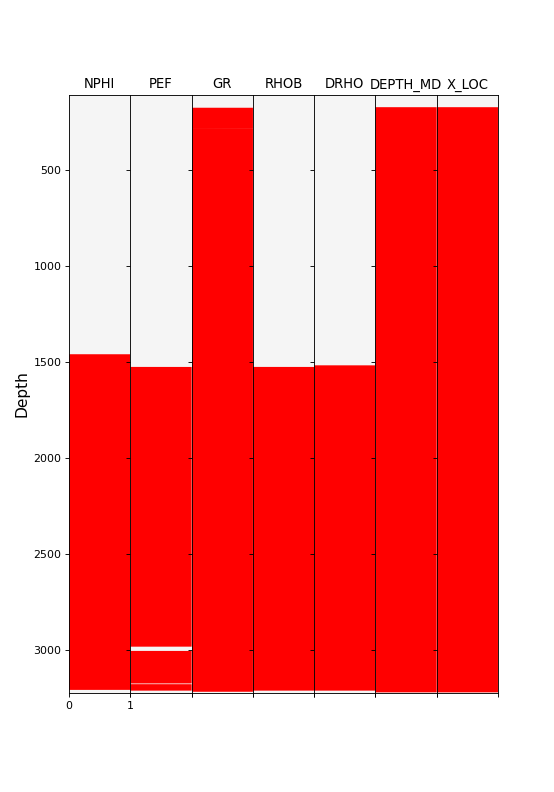

In [92]:
# Con este codigo vamos a plotear 7 curvas para poder encontrar el TP (tramo principal) del log
# Como vamos a plotearlas según su orden en el archivo lasio (INDEXING), vamos a utilizar el INDEXING para elegirlas.
# Con la variable primercol vamos a definir la primer curva utilizando el INDEXING.

well_nan = well.notnull() * 1

primercol = 12      # Primer curva que va a plotear 

fig = plt.subplots(figsize=(7,10))#Set up the plot axes
ax1 = plt.subplot2grid((1,7), (0,0), rowspan=1, colspan = 1) 
ax2 = plt.subplot2grid((1,7), (0,1), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,7), (0,2), rowspan=1, colspan = 1)
ax4 = plt.subplot2grid((1,7), (0,3), rowspan=1, colspan = 1)
ax5 = plt.subplot2grid((1,7), (0,4), rowspan=1, colspan = 1)
ax6 = plt.subplot2grid((1,7), (0,5), rowspan=1, colspan = 1)
ax7 = plt.subplot2grid((1,7), (0,6), rowspan=1, colspan = 1)

columns = well_nan.columns
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7]

for i, ax in enumerate(axes):
    ax.plot(well_nan.iloc[:,i], well_nan.index, lw=0)
    ax.set_ylim(las.well.STOP.value, las.well.STRT.value)
    ax.set_xlim(0, 1)
    ax.set_title(columns[i+primercol-1])                                                        # i+18
    ax.set_facecolor('whitesmoke')
    ax.fill_betweenx(well_nan.index, 0, well_nan.iloc[:,i+primercol-1], facecolor='red')        # i+18
    # Remove tick labels from each subplot
    if i > 0:
        plt.setp(ax.get_yticklabels(), visible = False)
        plt.setp(ax.get_xticklabels(), visible = False)

ax1.set_ylabel('Depth', fontsize=14)
plt.subplots_adjust(wspace=0)
plt.show()

In [93]:
well.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 20494 entries, 110.0 to 3224.936
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FORCE_2020_LITHOFACIES_CONFIDENCE  11146 non-null  float64
 1   FORCE_2020_LITHOFACIES_LITHOLOGY   11063 non-null  float64
 2   CALI                               11150 non-null  float64
 3   BS                                 20077 non-null  float64
 4   DCAL                               11150 non-null  float64
 5   ROPA                               20455 non-null  float64
 6   ROP                                20012 non-null  float64
 7   RDEP                               20055 non-null  float64
 8   RMED                               19995 non-null  float64
 9   DTS                                10719 non-null  float64
 10  DTC                                11239 non-null  float64
 11  NPHI                               11503 non-

## DECLARACION DE VARIABLES PARA PLOTEAR PERFILES COMBINADOS
Antes de plotear los perfiles combinados, vamos a declarar las variables a plotear. Esto lo hacemos por 2 motivos:
- Los nombre de las curvas son diferentes según la compañia de perfilaje.
- En el caso de que no contemos con una de las curvas incluidas en el plot, esta celda va a generarla con valores nulos (esto es porque si matplotlib no encuentra la curva, va a dar error y no va a plotear nada) 

In [94]:
# DECLARACION DE VARIABLES PARA PLOTEAR PERFILES COMBINADOS

bitsize = 8.75

## ax1
crv_cal = 'CALI'           # CALIPER
crv_bit = 'BS'             # BIT SIZE
crv_gr = 'GR'              # GAMMA RAY
crv_sp = 'SP'              # SPONTANEOUS POTENTIAL

# ax2
crv_dp_res = 'RDEP'         # DEEP RESISTIVITY
crv_sh_res = 'RMED'         # SHALLOW RESISTIVITY

#ax3
crv_neu_por = 'NPHI'        # NEUTRON POROSITY
crv_den_bulk = 'RHOB'       # BULK DENSITY


##############################################################

if crv_cal in well.columns:
    pass
else:
    well[crv_cal]=np.nan

##############    

if crv_bit in well.columns:
    pass
else:
    well[crv_bit]=bitsize

##############    

if crv_gr in well.columns:
    pass
else:
    well[crv_gr]=np.nan
    
##############  

if crv_sp in well.columns:
    pass
else:
    well[crv_sp]=np.nan
    
##############  

if crv_dp_res in well.columns:
    pass
else:
    well[crv_dp_res]=np.nan
    
##############  

if crv_sh_res in well.columns:
    pass
else:
    well[crv_sh_res]=np.nan
    
############## 

if crv_neu_por in well.columns:
    pass
else:
    well[crv_neu_por]=np.nan

##############  

if crv_den_bulk in well.columns:
    pass
else:
    well[crv_den_bulk]=np.nan
    
##############  

## PLOT PERFILES COMBINADOS
En la celda de abajo está el código para plotear 3 tracks:<br>
curvas convencionales(GR,CAL,BIT,SP) - resistividades(RDEP,RMED) - porosidades(BULKDEN,PORNEU)<br>

**TENER EN CUENTA:**<br>
- Para cambiar TOP y BOT del plot, modificar los valores **top_plot** y **bot_plot**.
- La cantidad de labels de cada track se modifica con las variables **ax1_ticks,ax2_ticks,etc **
- Los valores máximos y mínimos de las curvas representan en realidad su ubicación en el track (mínimo=izquierda, máximo=derecha),  por ejemplo los límites **gr_min=0, gr_max=200** serían para la curva GR, pero para la curva Porosidad Neutron serían **neupor_min = .6, neupor_max = 0**


In [102]:
abs(top_plot-bot_plot)/99

31.464646464646464

<IPython.core.display.Javascript object>


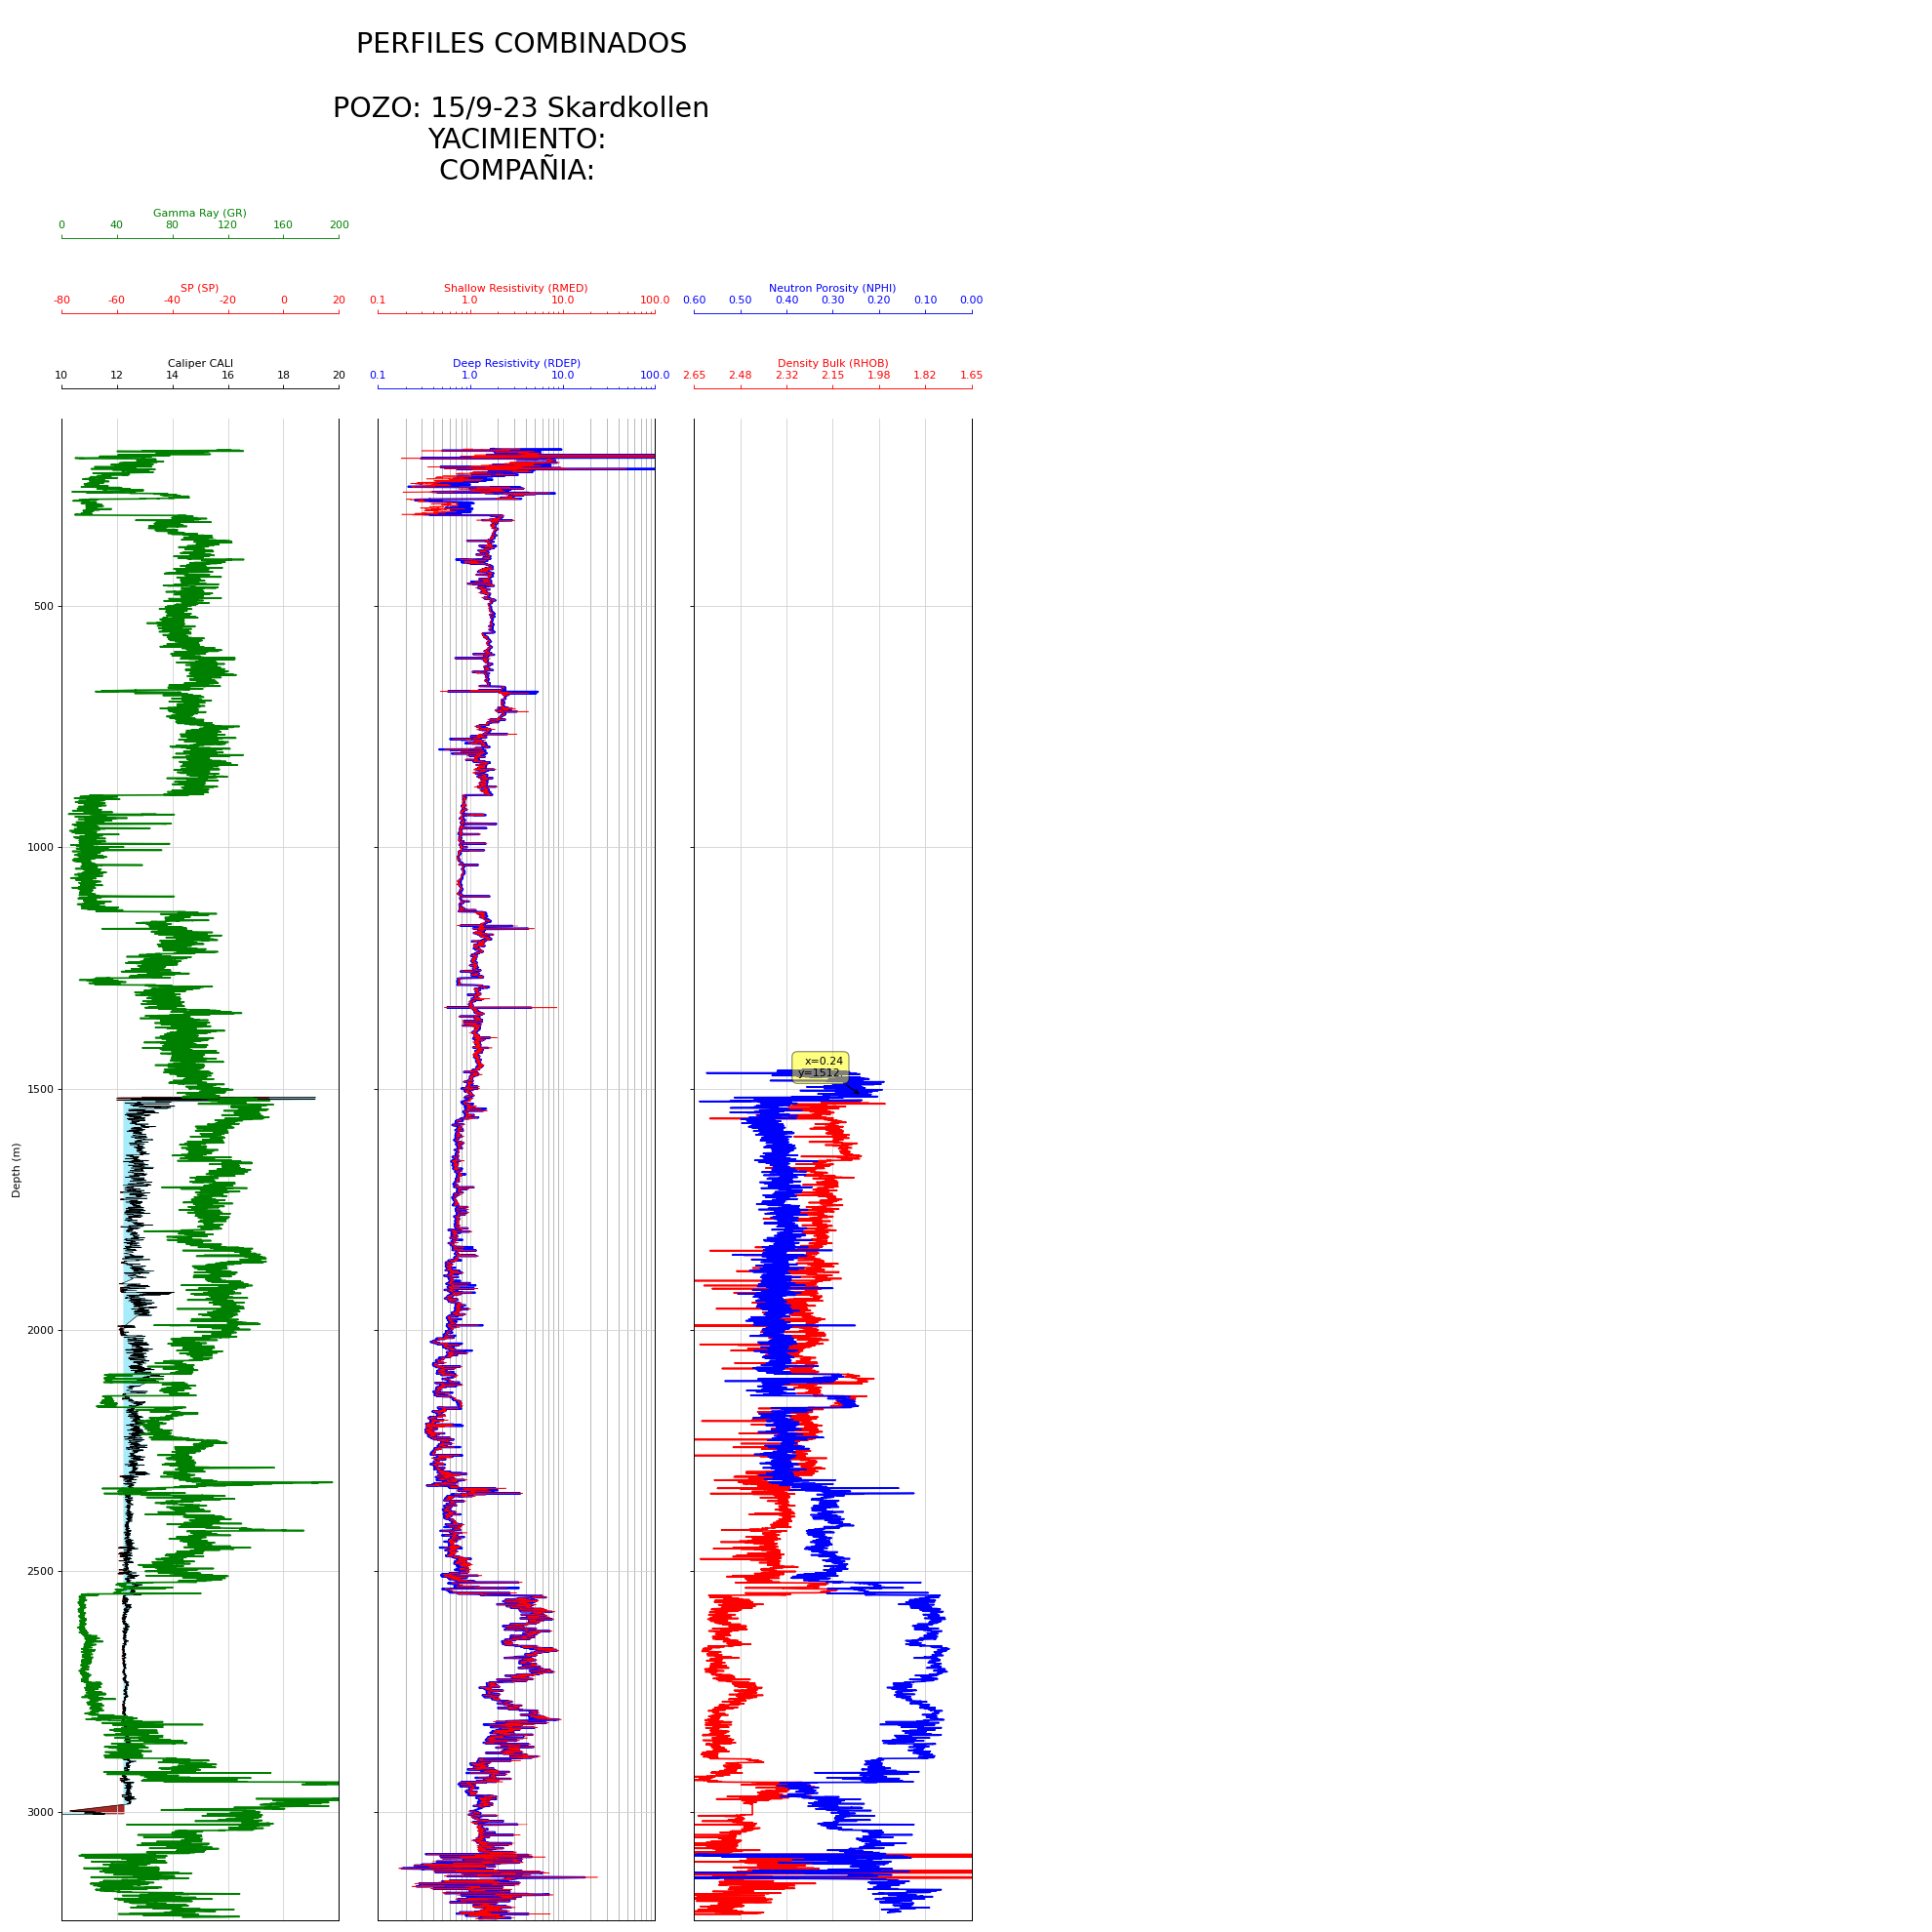

In [118]:
top_plot = las.well.STRT.value  # Valor default TOP del plot (modificar si es necesario)
bot_plot = las.well.STOP.value  # Valor default BOTTOM del plot (modificar si es necesario)


ax1_ticks = 6         # Track Convencionales
ax2_ticks = 6         # Track Resistividades
ax3_ticks = 7         # Track Porosidades



fig, ax = plt.subplots(figsize=(25,25))#Set up the plot axes
   
ax1 = plt.subplot2grid((1,6), (0,0), rowspan=1, colspan = 1) 
ax11 = ax1.twiny()
ax12 = ax1.twiny()

ax2 = plt.subplot2grid((1,6), (0,1), rowspan=1, colspan = 1, sharey = ax1)
ax21 = ax2.twiny()

ax3 = plt.subplot2grid((1,6), (0,2), rowspan=1, colspan = 1, sharey = ax1) #
ax31 = ax3.twiny() 



################################################################################

### CAL ###
cal_min = 10
cal_max = 20

ax1.plot(well[crv_cal], well.index, color = "black", linewidth = 0.5)
ax1.set_ylabel("Depth (m)")

if abs(top_plot-bot_plot) > 5000:
    ax1.yaxis.set_major_locator(MaxNLocator(round(abs(top_plot-bot_plot)/999)))

elif abs(top_plot-bot_plot) > 2000 and abs(top_plot-bot_plot) <= 5000:
    ax1.yaxis.set_major_locator(MaxNLocator(round(abs(top_plot-bot_plot)/450)))

elif abs(top_plot-bot_plot) > 500 and abs(top_plot-bot_plot) <= 2000:
    ax1.yaxis.set_major_locator(MaxNLocator(round(abs(top_plot-bot_plot)/99)))
    
elif abs(top_plot-bot_plot) <= 500 and abs(top_plot-bot_plot) > 200:
    ax1.yaxis.set_major_locator(MaxNLocator(round(abs(top_plot-bot_plot)/49)))
else:
    ax1.yaxis.set_major_locator(MaxNLocator(round(abs(top_plot-bot_plot)/24)))
    
ax1.set_xlabel(f"Caliper {well[crv_cal].name}")
ax1.set_xlim(cal_min, cal_max)
ax1.xaxis.label.set_color("black")
ax1.tick_params(axis='x', colors="black")
ax1.spines["top"].set_edgecolor("black")
ax1.set_xticks(np.arange(cal_min, cal_max+1, ((cal_max-cal_min)/(ax1_ticks-1))))
ax1.xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))

ax1.fill_betweenx(well.index, well[crv_bit], well[crv_cal], where=well[crv_bit]>=well[crv_cal], interpolate=True, color='brown')
ax1.fill_betweenx(well.index, well[crv_bit], well[crv_cal], where=well[crv_bit]<=well[crv_cal], interpolate=True, color='#a6ecfa')
################################################################################

### GR ###
gr_min=0
gr_max=200

ax11.plot(well[crv_gr], well.index, color = "green", linewidth = 1.5)
ax11.set_xlabel(f"Gamma Ray ({well[crv_gr].name})")
ax11.xaxis.label.set_color("green")
ax11.set_xlim(gr_min, gr_max)
ax11.tick_params(axis='x', colors="green")
ax11.spines["top"].set_position(("axes", 1.12))
ax11.spines["top"].set_visible(True)
ax11.spines["top"].set_edgecolor("green")
ax11.title.set_color('green')
ax11.set_xticks(np.arange(gr_min, gr_max+1, ((gr_max-gr_min)/(ax1_ticks-1))))
ax11.xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
################################################################################

### SP ###
sp_min=-80
sp_max=20

ax12.plot(well[crv_sp], well.index, color = "red", linewidth = 1.5)
ax12.set_xlabel(f"SP ({well[crv_sp].name})")
ax12.xaxis.label.set_color("red")
ax12.set_xlim(sp_min,sp_max)
ax12.tick_params(axis='x', colors="r")
ax12.spines["top"].set_position(("axes", 1.07))
ax12.spines["top"].set_visible(True)
ax12.spines["top"].set_edgecolor("r")
ax12.title.set_color('r')
ax12.set_xticks(np.arange(sp_min, sp_max+1, ((sp_max-sp_min)/(ax1_ticks-1))))
ax12.xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
################################################################################

### RESD ###
res_min=0.1
res_max=100

ax2.plot(well[crv_dp_res], well.index, color = "blue", linewidth = 2)
ax2.set_xlabel(f"Deep Resistivity ({well[crv_dp_res].name})")
ax2.set_xlim(res_min, res_max)
ax2.xaxis.label.set_color("blue")
ax2.tick_params(axis='x', colors="blue")
ax2.spines["top"].set_edgecolor("blue")
ax2.set_xticks(np.arange(res_min, res_max+.1, (res_max/(ax2_ticks-1))))
ax2.set_xscale("log")
ax2.grid(True, which="both", axis='x')
ax2.xaxis.set_major_formatter(StrMethodFormatter('{x:.1f}'))
################################################################################

### RESS ###


ax21.plot(well[crv_sh_res], well.index, color = "r", linewidth = 0.5)
ax21.set_xlabel(f"Shallow Resistivity ({well[crv_sh_res].name})")
ax21.set_xlim(res_min, res_max)
ax21.xaxis.label.set_color("r")
ax21.spines["top"].set_position(("axes", 1.07))
ax21.spines["top"].set_visible(True)
ax21.tick_params(axis='x', colors="r")
ax21.spines["top"].set_edgecolor("r")
ax21.set_xticks(np.arange(res_min, res_max+.1, ((res_max-res_min)/(ax2_ticks-1))))
ax21.set_xscale("log")
ax21.xaxis.set_major_formatter(StrMethodFormatter('{x:.1f}'))
################################################################################

### DEN BULK ###
denbulk_min = 2.65
denbulk_max = 1.65


ax3.plot(well[crv_den_bulk], well.index, color = "red", linewidth = 1.5)
ax3.set_xlabel(f"Density Bulk ({well[crv_den_bulk].name})")
ax3.set_xlim(denbulk_min,denbulk_max)
ax3.xaxis.label.set_color("red")
ax3.tick_params(axis='x', colors="r")
ax3.spines["top"].set_edgecolor("r")
ax3.set_xticks(np.arange(denbulk_max, denbulk_min+.01, ((denbulk_min-denbulk_max)/(ax3_ticks-1))))
ax3.xaxis.set_major_formatter(StrMethodFormatter('{x:.2f}'))
################################################################################

### NEU POR ###
neupor_min = .6
neupor_max = 0

ax31.plot(well[crv_neu_por], well.index, color = "blue", linewidth = 1.5)
ax31.set_xlabel(f"Neutron Porosity ({well[crv_neu_por].name})")
ax31.xaxis.label.set_color("b")
ax31.set_xlim(neupor_min,neupor_max)
ax31.tick_params(axis='x', colors="blue")
ax31.spines["top"].set_position(("axes", 1.07))
ax31.spines["top"].set_visible(True)
ax31.spines["top"].set_edgecolor("blue")
ax31.set_xticks(np.arange(neupor_max, neupor_min+.01, (abs(neupor_max-neupor_min)/(ax3_ticks-1))))
ax31.xaxis.set_major_formatter(StrMethodFormatter('{x:.2f}'))
################################################################################


fig.suptitle('\nPERFILES COMBINADOS\n\n'+"POZO: "+las.well.WELL.value+"\n"+"YACIMIENTO: "+las.well.FLD.value+"\n"+"COMPAÑIA: "+las.well.COMP.value,size=26,
             x=0.27,y=1)

# Common functions for setting up the plot can be extracted into
# a for loop. This saves repeating code.

for ax in [ax1, ax2, ax3]:
    ax.set_ylim(bot_plot, top_plot)
    ax.grid(which='major', color='lightgrey', linestyle='-')
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.spines["top"].set_position(("axes", 1.02))
 
    
for ax in [ax2, ax3]:
    plt.setp(ax.get_yticklabels(), visible = False)
  

fig.subplots_adjust(wspace = 0.2)

mplcursors.cursor(hover=True)
plt.tight_layout()
plt.show()